# Problem 5.2: Activation Statistics Before Training (5 points)

Q5.2: Activation Statistics Before Training (5 points)

Build a 6-layer MLP for MNIST classification:
- Architecture: 784 → 256 → 256 → 256 → 256 → 256 → 10
- Use Tanh activations for all hidden layers

For each of the 4 initialization methods:
1. Initialize the network (do **NOT** train yet)
2. Forward pass a batch of 256 random MNIST images
3. Record the mean and standard deviation of activations at each of the 5 hidden layers
4. Create a figure with 2 subplots:
   - Subplot 1: Mean activation vs. layer depth (4 lines, one per init method)
   - Subplot 2: Std of activation vs. layer depth (4 lines, one per init method)

In [39]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.ToTensor()

# Load MNIST
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# DataLoader: batch of 256 random MNIST images
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# Get one batch for activation statistics (Q5.2)
batch_images, batch_labels = next(iter(train_loader))
print(f"Batch images shape: {batch_images.shape}")  
print(f"Batch labels shape: {batch_labels.shape}")    



Batch images shape: torch.Size([256, 1, 28, 28])
Batch labels shape: torch.Size([256])


### Visualizing some of the images from the dataset

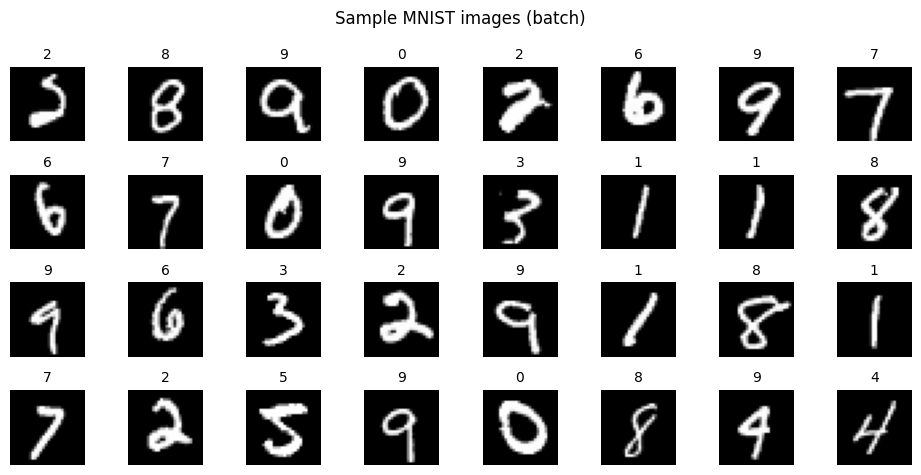

In [40]:
import matplotlib.pyplot as plt

# Visualize a grid of images from the batch
n_rows, n_cols = 4, 8
n_show = n_rows * n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.2, n_rows * 1.2))
for i, ax in enumerate(axes.flat):
    if i < n_show:
        img = batch_images[i].squeeze() 
        ax.imshow(img, cmap="gray")
        ax.set_title(int(batch_labels[i]), fontsize=10)
    ax.axis("off")
plt.suptitle("Sample MNIST images (batch)", fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
import math
import torch
import torch.nn as nn


def initialize_weights(shape, method):
    """
    Args:
        shape: tuple of (fan_in, fan_out)
        method: 'zero', 'small_random', 'xavier', 'he'
    Returns:
        torch.Tensor of initialized weights
    """
    if len(shape) != 2:
        raise ValueError("Shape must be a tuple of (fan_in, fan_out)")
    fan_in, fan_out = shape
    if method == 'zero':
        return torch.zeros(shape)
    elif method == 'small_random':
        return torch.randn(shape) * 0.01
    elif method == 'xavier':
        sigma = math.sqrt(2 / (fan_in + fan_out))
        return torch.randn(shape) * sigma
    elif method == 'he':
        sigma = math.sqrt(2 / fan_in)
        return torch.randn(shape) * sigma
    else:
        raise ValueError("Unknown method")


class MLPLayer(nn.Module):
    """
    6-layer MLP for MNIST: 784 → 256 → 256 → 256 → 256 → 256 → 10
    Tanh activations on all hidden layers.
    """
    def __init__(self, init_method="xavier"):
        super().__init__()
        self.init_method = init_method

        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc6 = nn.Linear(256, 10)

        self.act = nn.Tanh()

        self._init_weights(init_method)

    ## reusing the initialize_weights function from Q5.1
    def _init_weights(self, method):
        for m in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5, self.fc6]:
            w = initialize_weights((m.in_features, m.out_features), method)
            m.weight.data = w.t()
            m.bias.data.zero_()

    def forward(self, x):
        # x: (batch, 784) — flatten in caller if x is (batch, 1, 28, 28)
        h1 = self.act(self.fc1(x))
        h2 = self.act(self.fc2(h1))
        h3 = self.act(self.fc3(h2))
        h4 = self.act(self.fc4(h3))
        h5 = self.act(self.fc5(h4))
        out = self.fc6(h5)  
        # Return logits and hidden activations for Q5.2 stats
        return out, (h1, h2, h3, h4, h5)



In [42]:
## one batch of 256 random MNIST images
x = batch_images.flatten(start_dim=1)           
print(x.shape)

torch.Size([256, 784])


In [ ]:
## different models with different initialization methods
model_zero = MLPLayer(init_method="zero")
model_random = MLPLayer(init_method="small_random")
model_xavier = MLPLayer(init_method="xavier")
model_he = MLPLayer(init_method="he")



def unpack_forward(result):
    if len(result) == 2:
        logits, hiddens = result
        return logits, hiddens
    logits, h1, h2, h3, h4, h5 = result
    return logits, [h1, h2, h3, h4, h5]

mode_zero_results, mode_zero_hidden = unpack_forward(model_zero(x))
mode_random_results, mode_random_hidden = unpack_forward(model_random(x))
mode_xavier_results, mode_xavier_hidden = unpack_forward(model_xavier(x))
mode_he_results, mode_he_hidden = unpack_forward(model_he(x))



## testing the 


for i in range(5):
    print("Mean of hidden layer " + str(i+1) + " for mode zero: " + str(mode_zero_hidden[i].mean()))
    print("Std of hidden layer " + str(i+1) + " for mode zero: " + str(mode_zero_hidden[i].std()))

print("--------------------------------")

for i in range(5):
    print("Mean of hidden layer " + str(i+1) + " for mode random: " + str(mode_random_hidden[i].mean()))
    print("Std of hidden layer " + str(i+1) + " for mode random: " + str(mode_random_hidden[i].std()))

print("--------------------------------")

for i in range(5):
    print("Mean of hidden layer " + str(i+1) + " for mode xavier: " + str(mode_xavier_hidden[i].mean()))
    print("Std of hidden layer " + str(i+1) + " for mode xavier: " + str(mode_xavier_hidden[i].std()))

print("--------------------------------")

for i in range(5):
    print("Mean of hidden layer " + str(i+1) + " for mode he: " + str(mode_he_hidden[i].mean()))
    print("Std of hidden layer " + str(i+1) + " for mode he: " + str(mode_he_hidden[i].std()))







Mean of hidden layer 1 for mode zero: tensor(0., grad_fn=<MeanBackward0>)
Std of hidden layer 1 for mode zero: tensor(0., grad_fn=<StdBackward0>)
Mean of hidden layer 2 for mode zero: tensor(0., grad_fn=<MeanBackward0>)
Std of hidden layer 2 for mode zero: tensor(0., grad_fn=<StdBackward0>)
Mean of hidden layer 3 for mode zero: tensor(0., grad_fn=<MeanBackward0>)
Std of hidden layer 3 for mode zero: tensor(0., grad_fn=<StdBackward0>)
Mean of hidden layer 4 for mode zero: tensor(0., grad_fn=<MeanBackward0>)
Std of hidden layer 4 for mode zero: tensor(0., grad_fn=<StdBackward0>)
Mean of hidden layer 5 for mode zero: tensor(0., grad_fn=<MeanBackward0>)
Std of hidden layer 5 for mode zero: tensor(0., grad_fn=<StdBackward0>)
--------------------------------
Mean of hidden layer 1 for mode random: tensor(-0.0007, grad_fn=<MeanBackward0>)
Std of hidden layer 1 for mode random: tensor(0.0943, grad_fn=<StdBackward0>)
Mean of hidden layer 2 for mode random: tensor(-0.0003, grad_fn=<MeanBackward0

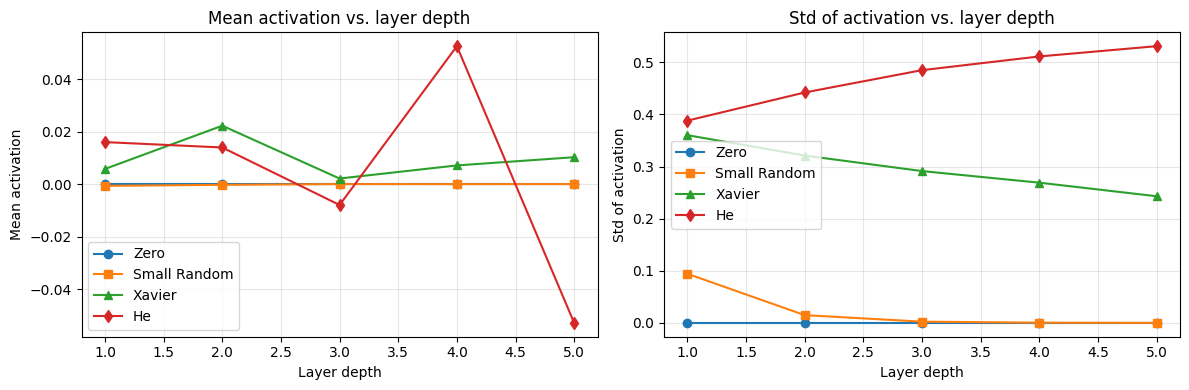

In [ ]:
# 3. Record mean and std of activations at each of the 5 hidden layers (for all 4 init methods)
layer_depth = list(range(1, 6))  # 1, 2, 3, 4, 5

means_zero   = [h.mean().item() for h in mode_zero_hidden]
means_random = [h.mean().item() for h in mode_random_hidden]
means_xavier = [h.mean().item() for h in mode_xavier_hidden]
means_he     = [h.mean().item() for h in mode_he_hidden]

stds_zero   = [h.std().item() for h in mode_zero_hidden]
stds_random = [h.std().item() for h in mode_random_hidden]
stds_xavier = [h.std().item() for h in mode_xavier_hidden]
stds_he     = [h.std().item() for h in mode_he_hidden]

# 4. Figure with 2 subplots: Mean activation vs layer depth, Std vs layer depth (4 lines each)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(layer_depth, means_zero,   "o-", label="Zero")
ax1.plot(layer_depth, means_random, "s-", label="Small Random")
ax1.plot(layer_depth, means_xavier, "^-", label="Xavier")
ax1.plot(layer_depth, means_he,     "d-", label="He")
ax1.set_xlabel("Layer depth")
ax1.set_ylabel("Mean activation")
ax1.set_title("Mean activation vs. layer depth")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(layer_depth, stds_zero,   "o-", label="Zero")
ax2.plot(layer_depth, stds_random, "s-", label="Small Random")
ax2.plot(layer_depth, stds_xavier, "^-", label="Xavier")
ax2.plot(layer_depth, stds_he,     "d-", label="He")
ax2.set_xlabel("Layer depth")
ax2.set_ylabel("Std of activation")
ax2.set_title("Std of activation vs. layer depth")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. plot the mean and std of the hidden layers

### Written Analysis (3–4 sentences)

**Which initialization methods show vanishing activations (std → 0)?**  
Zero initialization gives exactly zero activations (mean and std 0) at every hidden layer because all weights and biases are zero. Small random initialization also shows vanishing activations: std drops sharply across layers (from about 0.09 at layer 1 to nearly 0 by layer 5), so activations collapse toward zero as depth increases.

**Which maintain stable activation statistics across layers?**  
Xavier and He both keep activations from vanishing. Xavier keeps mean and std relatively stable across the five hidden layers (std in a moderate range, e.g. ~0.24–0.36). He keeps or slightly increases std across layers with Tanh (e.g. std growing from about 0.39 to 0.53), so it maintains non-vanishing activations but can lead to larger activations in deeper layers when used with Tanh.

**Why is Xavier designed for Tanh/Sigmoid?**  
Xavier/Glorot uses σ² = 2/(fan_in + fan_out) so that the variance of layer inputs and outputs is preserved under the assumption of linear activations and zero mean. Tanh and Sigmoid are approximately linear near 0, so this “variance-preserving” choice helps keep activations from vanishing or exploding across layers when using these activations. He (σ² = 2/fan_in) is derived for ReLU (which zeros half the activations), so it is better suited to ReLU than to Tanh/Sigmoid.